***
# <font color='purple' size=10>Statistics With Language 'R':</font>
# <font color='purple'>Correlation and Regression</font>
***

# <font color='lightgreen'> Knowing The Data</font>
***

## <font color='lightgreen'> Project Dataset</font>
***

### National Household Sample Survey - 2015

The **National Household Sample Survey - PNAD** investigates annually, on a permanent basis, general characteristics of the population, education, work, income and housing and others, with variable frequency, according to the information needs of the country , such as features on migration, fertility, nuptiality, health, food security, among other topics. The survey of these statistics constitutes, over the 49 years of research, an important instrument for formulating, validating and evaluating policies aimed at socioeconomic development and improving living conditions in Brazil.

### Data Source

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

***
### Variables used

### Income
***

Monthly income from main job for people aged 10 or over.

### Age
***

Age of the resident on the reference date in years.

### Height (own elaboration)
***

Resident's height in meters.

### UF
***

|Code|Description|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazons|
|14|Roraima|
|15|Para|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Holy Spirit|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sex
***

|Code|Description|
|---|---|
|0|Masculine|
|1|Feminine|

### Years of Study
***

|Code|Description|
|---|---|
|1|No education and less than 1 year|
|2|1 year|
|3|2 years|
|4|3 years|
|5|4 years|
|6|5 years|
|7|6 years|
|8|7 years|
|9|8 years|
|10|9 years|
|11|10 years|
|12|11 years|
|13|12 years old|
|14|13 years old|
|15|14 years old|
|16|15 years or more|
|17|Not determined|
||Not applicable|

### Color
***

|Code|Description|
|---|---|
|0|Indigenous|
|2|White|
|4|Black|
|6|Yellow|
|8|Brown|
|9|No statement|

***
## <font color='purple'>Imports:</font>
***

In [107]:
library(ggplot2)
library(dplyr)
library(DescTools)
library(BSDA)

***
### <font color='purple'>Configs:</font>
***

In [2]:
options(repr.plot.width = 12, repr.plot.height = 6)

***
## <font color='lightgreen'>Loading Project Dataset:</font>
***

In [3]:
dataset <- read.csv('dataset_IBGE.csv')

In [4]:
head(dataset)

,UF,Sex,Age,Color,Years.of.Studies,Income,Height
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


***
## <font color='lightgreen'>Running a Linear Regression
***

## Example dataset
> ### $Y$ = Household spending
> ### $X$ = Household Income

In [5]:
dataset_regression = data.frame(
    Y = c(3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770),
    X = c(9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800)
)

In [6]:
head(dataset_regression)

,Y,X
,<dbl>,<dbl>
1,3011,9714
2,1305,3728
3,1879,6062
4,2654,8845
5,2849,8378
6,1068,3338


In [7]:
nrow(dataset_regression)

[1] 50

## Descriptive Statistics

In [8]:
summary(dataset_regression)

       Y              X       
 Min.   : 353   Min.   :1069  
 1st Qu.:1362   1st Qu.:3516  
 Median :2127   Median :6363  
 Mean   :2011   Mean   :6066  
 3rd Qu.:2676   3rd Qu.:8382  
 Max.   :3302   Max.   :9997  

In [9]:
apply(dataset_regression, 2, sd)

Y         X 
 817.2146 2707.1878

## Graphical Analysis

In [10]:
stack(dataset_regression)

values,ind
<dbl>,<fct>
3011,Y
1305,Y
1879,Y
2654,Y
2849,Y
1068,Y
2892,Y
2543,Y
3074,Y


In [11]:
config_graphic <- theme(
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.y = element_text(size = 12, vjust = 0.2),
    axis.title.x = element_text(size = 12, vjust = -0.2),
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10)
)

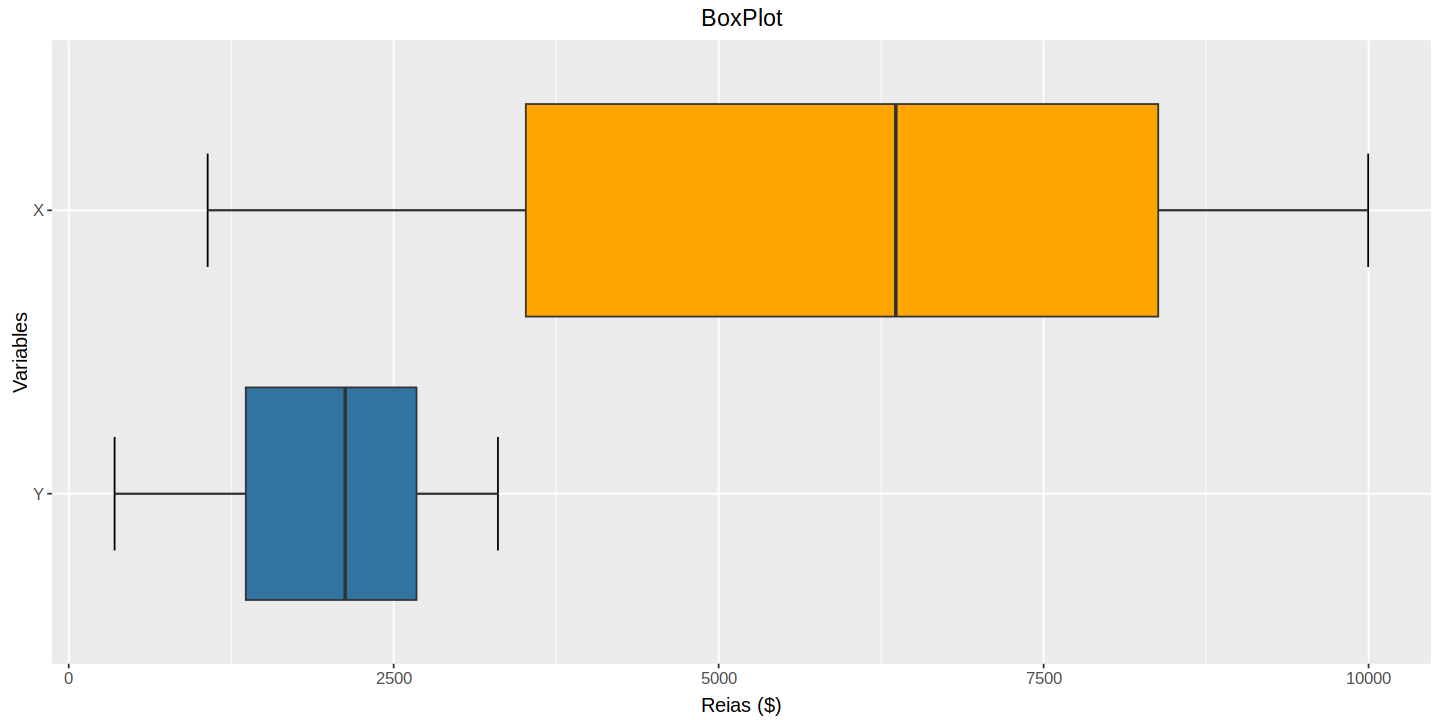

In [12]:
ggplot(stack(dataset_regression), aes(x = ind, y = values))+
    stat_boxplot(geom = 'errorbar', width = 0.4)+
    geom_boxplot(fill = c('#3274A1', 'orange'))+
    coord_flip()+
    xlab('Variables')+
    ylab('Reias ($)')+
    ggtitle('BoxPlot')+
    config_graphic


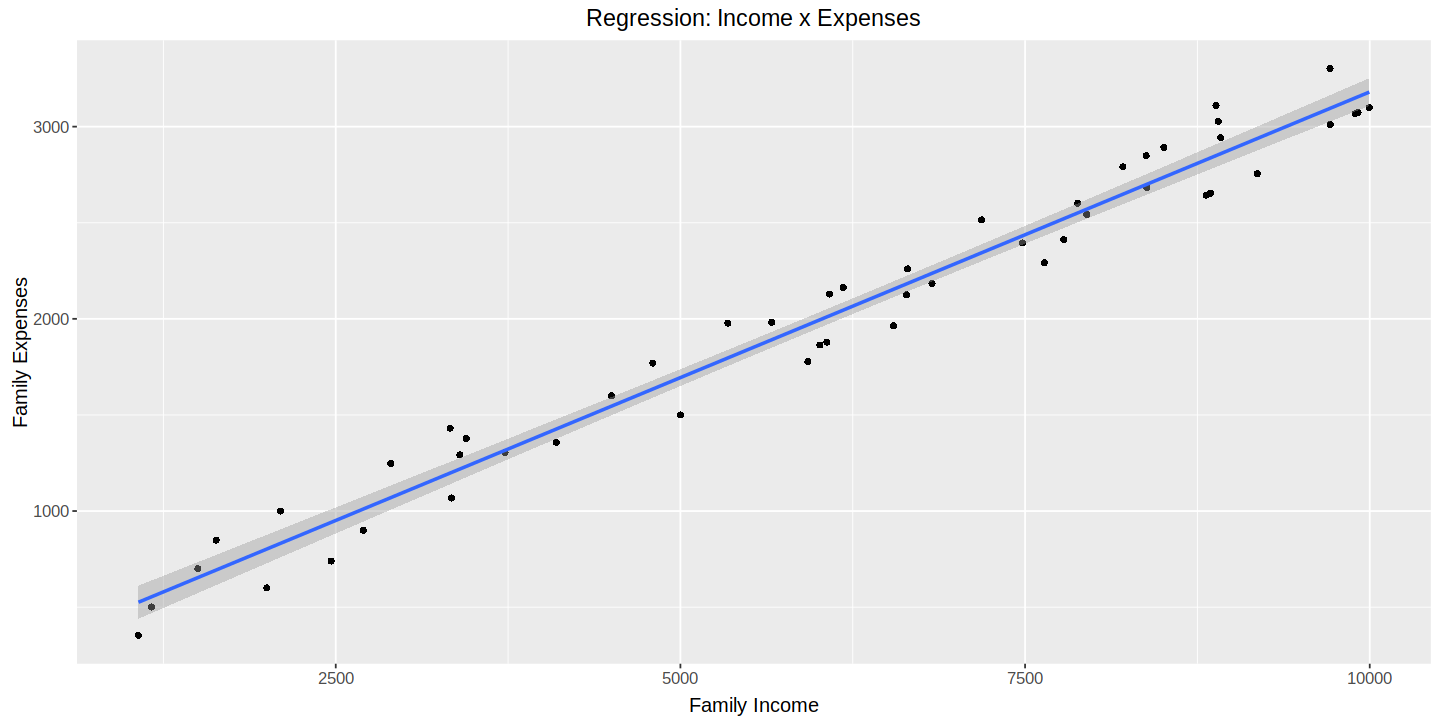

In [13]:
ggplot(data = dataset_regression, aes(x = X, y = Y))+
    geom_point(size = 2, stroke = 0)+
    geom_smooth(method = lm, formula = 'y ~ x')+
    xlab('Family Income')+
    ylab('Family Expenses')+
    ggtitle('Regression: Income x Expenses')+
    config_graphic
  

### Correlation Analysis

In [14]:
cor(dataset_regression)

,Y,X
Y,1.0000000,0.9848352
X,0.9848352,1.0000000


### Linear Regression Model

In [15]:
model_regression <- lm(formula = Y ~ X, data = dataset_regression)
model_regression


Call:
lm(formula = Y ~ X, data = dataset_regression)

Coefficients:
(Intercept)            X  
   207.9033       0.2973  


In [16]:
summary(model_regression)


Call:
lm(formula = Y ~ X, data = dataset_regression)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


### Getting the in-sample predictions

In [17]:
dataset_regression['Y_estimated'] <- model_regression$fitted.values
head(dataset_regression)

,Y,X,Y_estimated
,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785
2,1305,3728,1316.203
3,1879,6062,2010.079
4,2654,8845,2837.439
5,2849,8378,2698.605
6,1068,3338,1200.260


***
## <font color='lightgreen'>Correlation</font>
***

## <font color='lightgreen'>Covariance</font>
***

Covariance, or joint variance, is the measure of the degree of numerical interdependence (or interrelationship) between two variables. It is defined as follows:

### Population covariance

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Sample covariance

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

### Generating a random sample

In [18]:
sample <- data.frame(
    Age = c(39, 29, 21, 49, 29, 34, 32, 32, 24, 53, 28, 28, 46, 58, 41, 43, 31, 55, 52, 54),
    Income = c(1500, 1000, 3500, 1570, 600, 1200, 2000, 500, 1300, 600, 1500, 3000, 0, 550, 1500, 1600, 746, 1000, 0, 1400),
    Years.Of.Study = c(6, 7, 12, 13, 9, 12, 12, 6, 7, 5, 7, 16, 12, 3, 12, 9, 1, 6, 1, 6),
    Height = c(1.6162, 1.7525, 1.6940, 1.8041, 1.7854, 1.7468, 1.6633, 1.6937, 1.6569, 1.6671, 1.6786, 1.6730, 1.7853, 1.6090, 1.7833, 1.6709, 1.6392, 1.6861, 1.7107, 1.7288)
)

### Obtaining the covariance matrix

In [19]:
cov_matrix <- cov(sample)
cov_matrix

,Age,Income,Years.Of.Study,Height
Age,1.344105e+02,-4947.96842,-16.4105263,0.016483684
Income,-4.947968e+03,764668.32632,2209.0210526,-7.139630000
Years.Of.Study,-1.641053e+01,2209.02105,16.9368421,0.111258421
Height,1.648368e-02,-7.13963,0.1112584,0.003353907


### Identifying variances on the main diagonal of the matrix

In [20]:
var(sample$Age)

[1] 134.4105

***
## <font color='lightgreen'>Covariance Interpretation</font>
***

Positive $S_{xy}$ value indicates a positive linear association between x and y, that is, as the value of x increases, the value of y also increases. In this case, we can see in the figure below that the points that have the greatest influence on $S_{xy}$ must be in quadrants I and III.

If the value of $S_{xy}$ is negative, we have an indication of a negative linear association between x and y, that is, as x increases, the value of y decreases. In this case, we can see in the figure below that the points that have the greatest influence on $S_{xy}$ must be in quadrants II and IV.

Finally, if the points are uniformly distributed across the quadrants, the value of $S_{xy}$ will approach zero, indicating that there is no linear association between x and y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### Checking the existence of a negative linear association

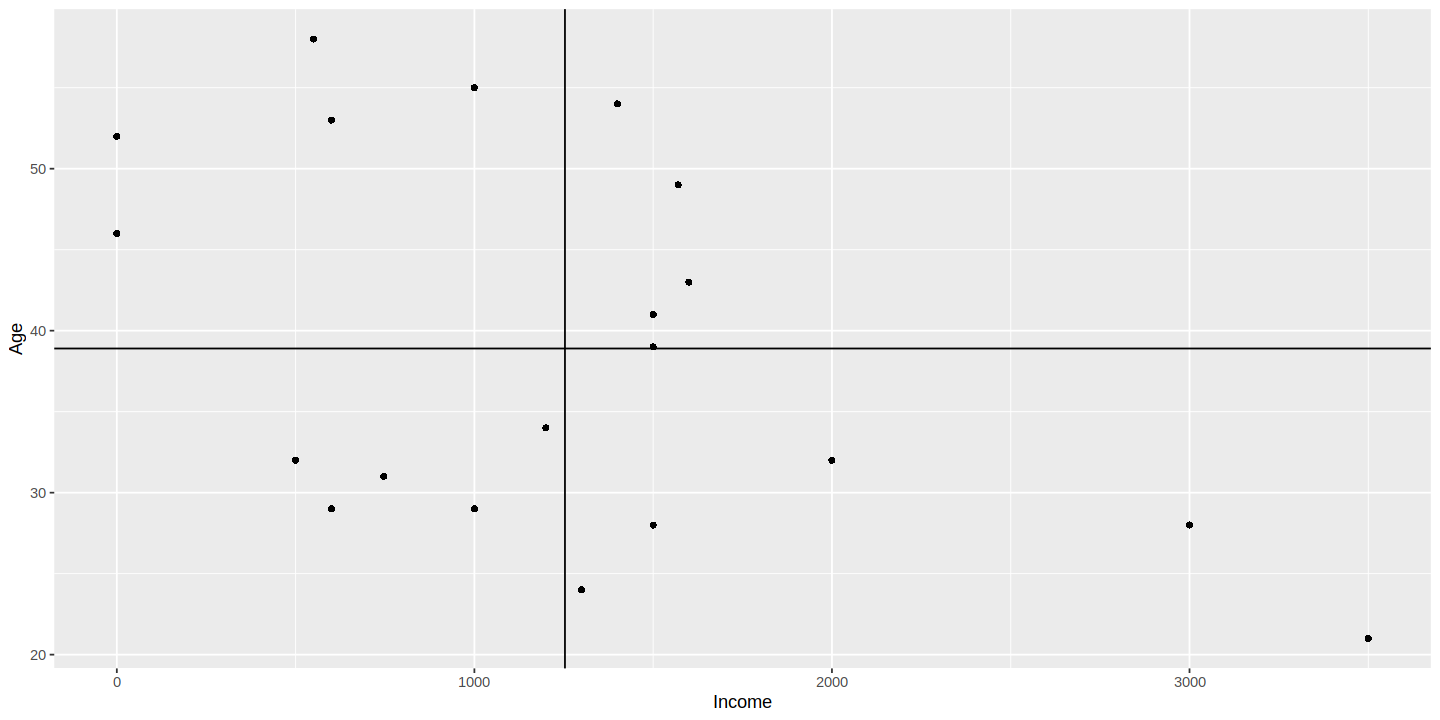

In [21]:
graphic <- sample[, c('Income', 'Age')]

ggplot(data = graphic, aes(x = Income, y = Age)) +
    geom_point(size = 2, stroke = 0) +
    geom_hline(yintercept = mean(sample$Age), color = 'black') +
    geom_vline(xintercept = mean(sample$Income), color = 'black')

### Checking the existence of a positive linear association

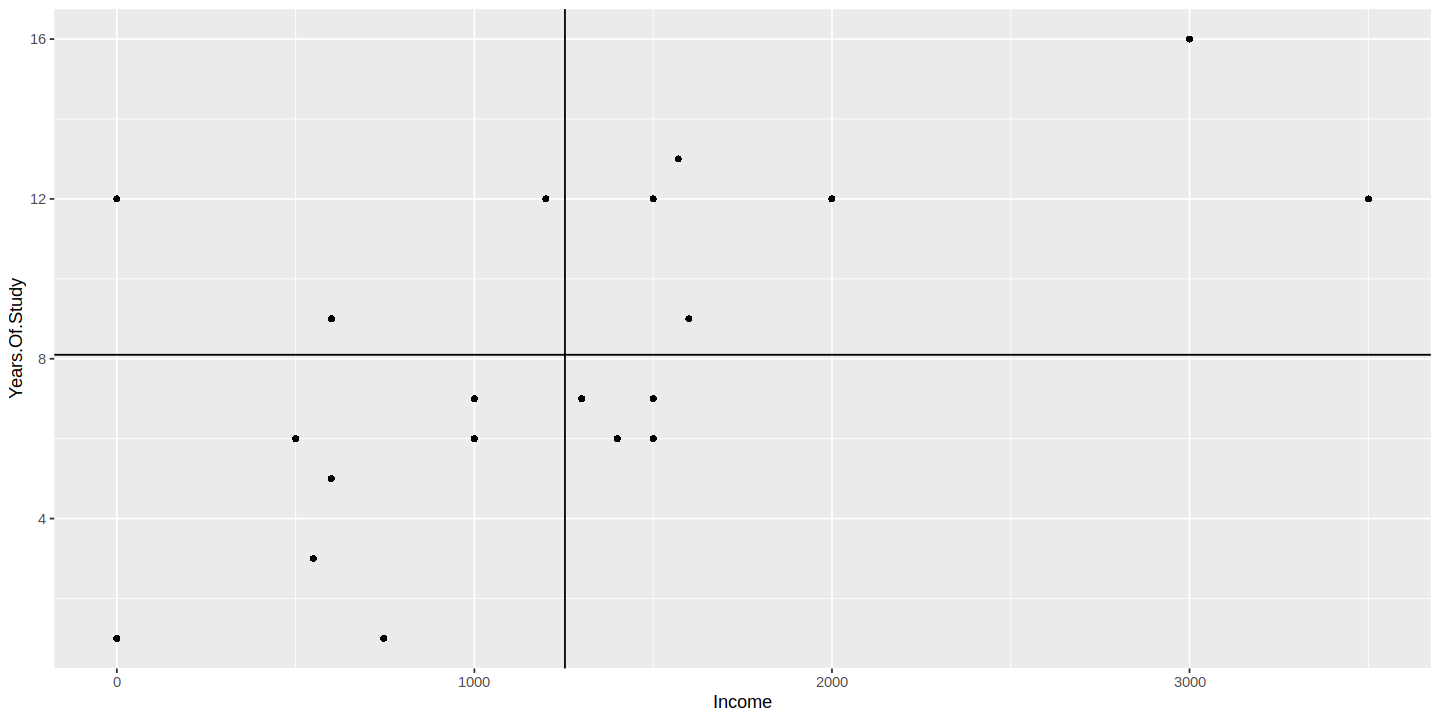

In [22]:
graphic <- sample[, c('Income', 'Years.Of.Study')]

ggplot(data = graphic, aes(x = Income, y = Years.Of.Study)) +
    geom_point(size = 2, stroke = 0) +
    geom_hline(yintercept = mean(sample$Years.Of.Study), color = 'black') +
    geom_vline(xintercept = mean(sample$Income), color = 'black')

### Checking the non-existence of a linear association between the variables

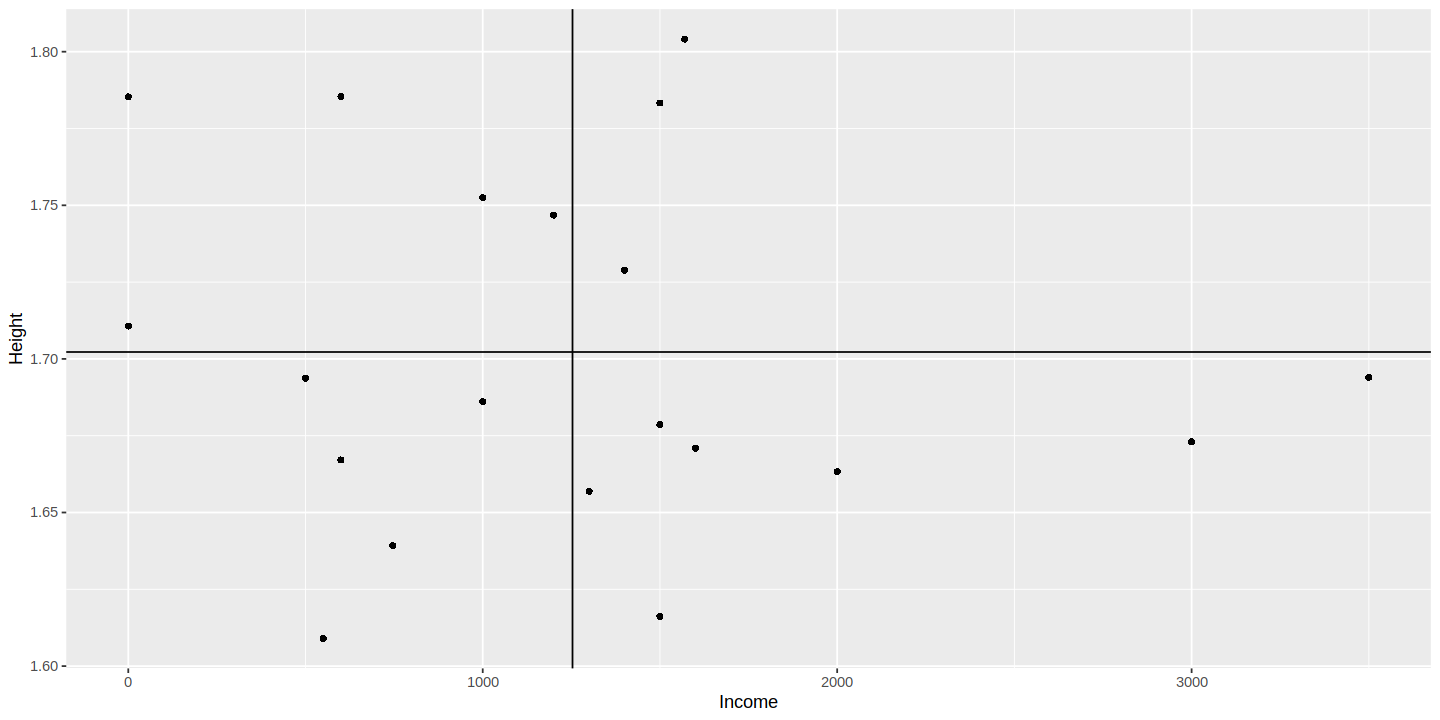

In [23]:
graphic <- sample[, c('Income', 'Height')]

ggplot(data = graphic, aes(x = Income, y = Height)) +
    geom_point(size = 2, stroke = 0) +
    geom_hline(yintercept = mean(sample$Height), color = 'black') +
    geom_vline(xintercept = mean(sample$Income), color = 'black')

### <font color='red'>Important Note:</font>
> From what has been presented, it may seem that high values, both positive and negative, for covariance indicate strong linear relationships between the variables involved. However, a problem when using covariance as a measure of the strength of the linear relationship is that the value of the covariance depends on the units of measurement for x and y.
>
> A measure of the relationship between two variables that is not affected by the units of measurement for x and y is the correlation coefficient that we will see in the next topic.

***
## <font color='lightgreen'>Pearson Correlation Coefficient<font>
***

It is obtained by dividing the covariance of the population or sample by the product of the population or sample standard deviation of x by the population or sample standard deviation of y.

The correlation coefficient ranges from -1 to +1. Values approaching -1 or +1 indicate a strong linear relationship. The closer the correlation is to zero, the weaker the relationship.

An important point is that the correlation coefficient is a measure of linear association and not necessarily causation. A high correlation between two variables does not necessarily mean that variations in one of them will cause changes in the other.

### Pearson correlation coefficient - population data

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Pearson correlation coefficient - sample data

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Where

$\sigma_{xy}$ = population covariance between x and y

$s_{xy}$ = sample covariance between x and y

$\sigma_{x}$ e $\sigma_{y}$ = population standard deviations of x and y, respectively

$s_{x}$ e $s_{y}$ = sample standard deviations of x and y, respectively

### Getting $s_{xy}$

In [24]:
s_xy <-cov(sample[c('Height', 'Income')])
s_xy

,Height,Income
Height,0.003353907,-7.13963
Income,-7.139630000,764668.32632


In [25]:
s_xy <- s_xy['Height', 'Income']
s_xy

[1] -7.13963

### Getting $s_x$ e $s_y$

In [26]:
s_x <- sd(sample$Height)
s_y <- sd(sample$Income)
s_x
s_y

[1] 0.05791292

[1] 874.4532

### Obtaining the Correlation Coeficcient$r_{xy}$

In [27]:
r_xy <- s_xy / (s_y * s_x)
r_xy

[1] -0.140982

### Obtaining a correlation matrix

In [28]:
cor(sample[c('Age', 'Income')])

,Age,Income
Age,1.0000000,-0.4880606
Income,-0.4880606,1.0000000


In [29]:
cor(dataset_regression[c('X', 'Y')])

,X,Y
X,1.0000000,0.9848352
Y,0.9848352,1.0000000


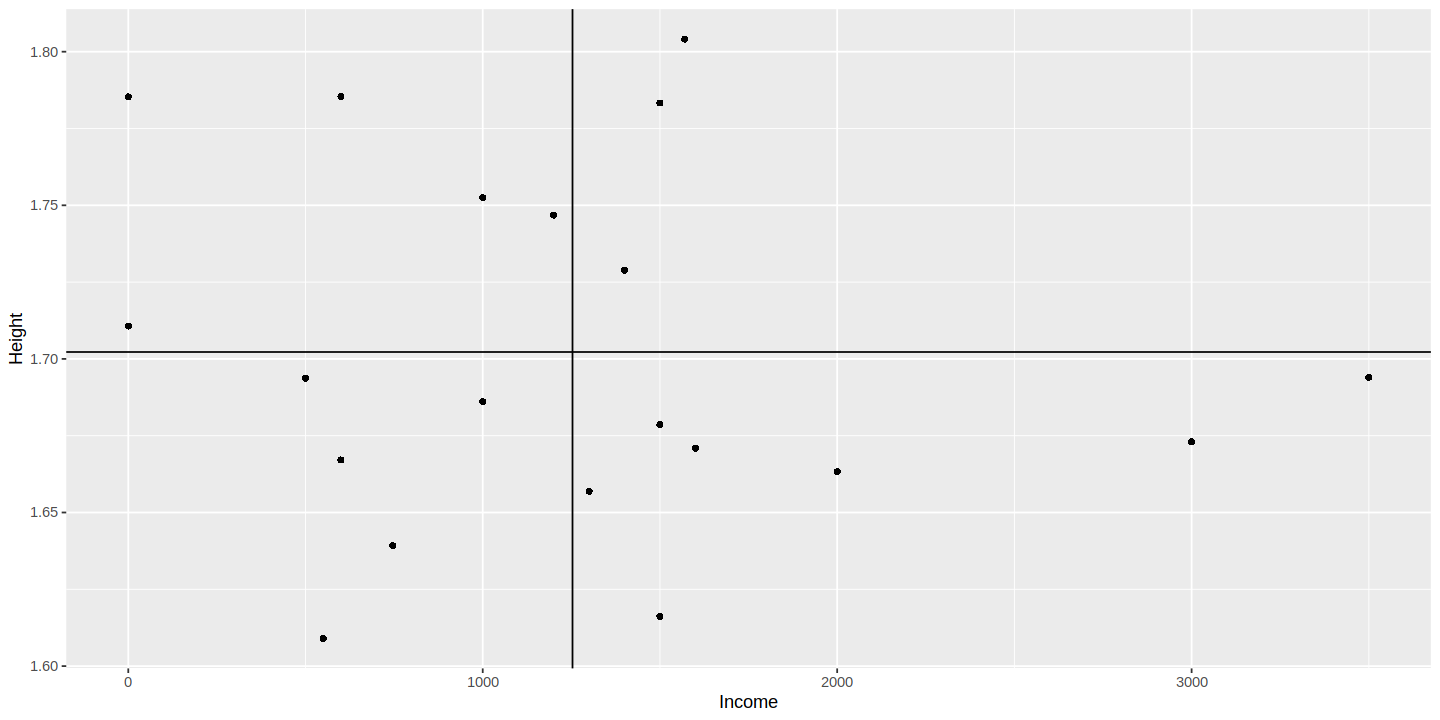

In [30]:
graphic <- sample[, c('Income', 'Height')]

ggplot(data = graphic, aes(x = Income, y = Height)) +
    geom_point(size = 2, stroke = 0)+
    geom_hline(yintercept = mean(sample$Height), color = 'black') +
    geom_vline(xintercept = mean(sample$Income), color = 'black')

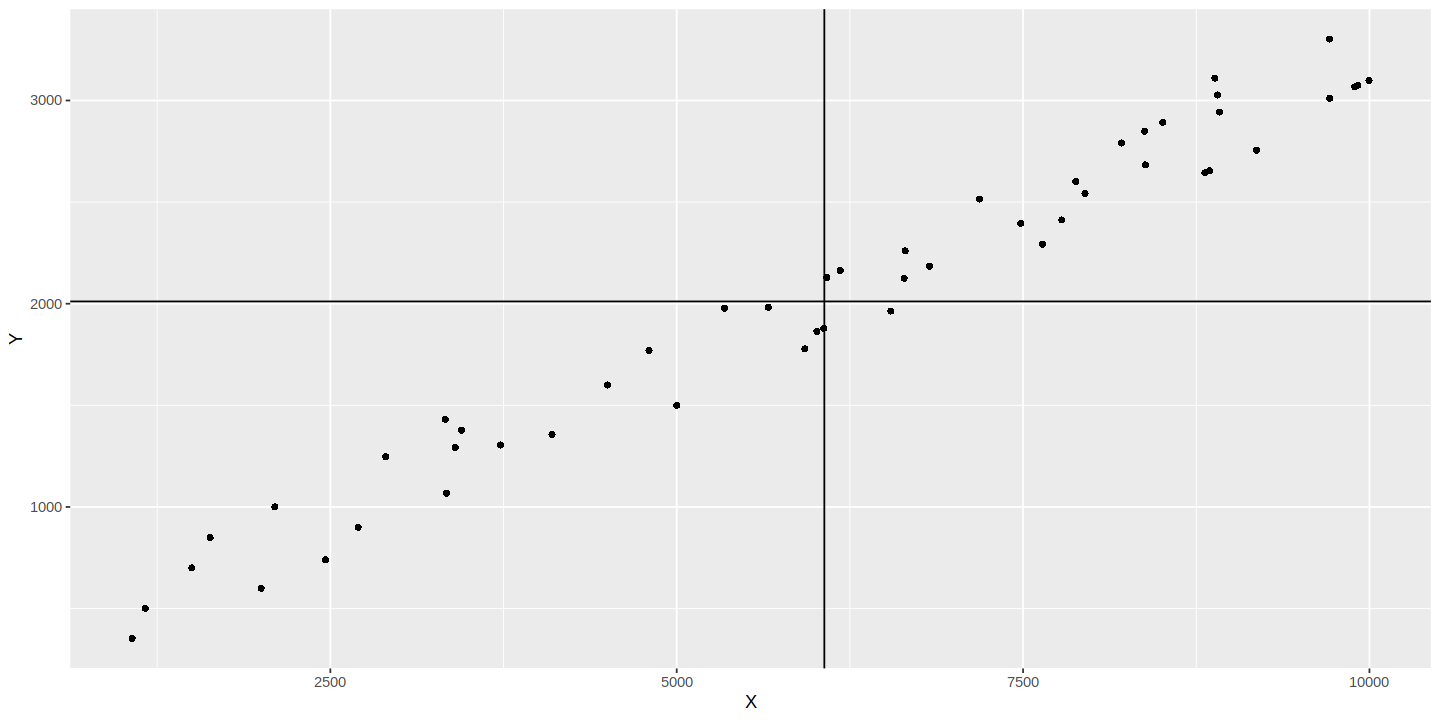

In [31]:
ggplot(data = dataset_regression, aes(x = X, y = Y)) +
    geom_point(size = 2, stroke = 0) +
    geom_hline(yintercept = mean(dataset_regression$Y), color = 'black') +
    geom_vline(xintercept = mean(dataset_regression$X), color = 'black')

***
## <font color = 'lightgreen'>Linear Regression </font>
***

Regression analysis concerns the study of the dependence of a variable (the dependent variable) in relation to one or more variables, the explanatory or independent variables, aiming to estimate and/or predict the average value of the first in terms of known or fixed values of the second ones.

#### Terminology

> The variable that is predicted is known as the dependent variable (*Y*).

> The variable used to predict the value of the dependent variable is known as the independent variable (*X*).

In our training we will cover the simplest type of regression analysis that considers one dependent variable and only one independent variable where the relationship between the variables approaches a straight line.

***
## <font color = 'lightgreen'> Simple Linear Regression</font>
***

### Consumption function

A famous economist from the past concluded in one of his studies that individuals tend to increase their consumption as their income increases. Logically, this theory gained a little more complexity, but we will use its simplest form to understand the regression analysis procedure with the following formulation:

# $$Y_i = \beta_1 + \beta_2X_i$$

Where

- $Y_i$ is household spending or household consumption

- $X_i$ is the disposable income

- $\beta_1$ is known as the intercept (in the theoretical model above it is known as autonomous consumption, that is, consumption when income is zero)

- $\beta_2$ is the angular coefficient (in the theoretical model it is the marginal propensity to consume)

In a simple linear regression analysis, the interest is in estimating the population regression function as presented above, that is, estimating the values of the parameters $\beta_1$ and $\beta_2$ based on the observations of $Y$ and $ X$.

### Loading Dataset

In [32]:
dataset_regression <- data.frame(
    Y = c(3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770),
    X = c(9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800)
)

In [33]:
head(dataset_regression)

,Y,X
,<dbl>,<dbl>
1,3011,9714
2,1305,3728
3,1879,6062
4,2654,8845
5,2849,8378
6,1068,3338


### Identifying the relationship between variables

Plotting the regression line between two variables together with the dispersion between them.

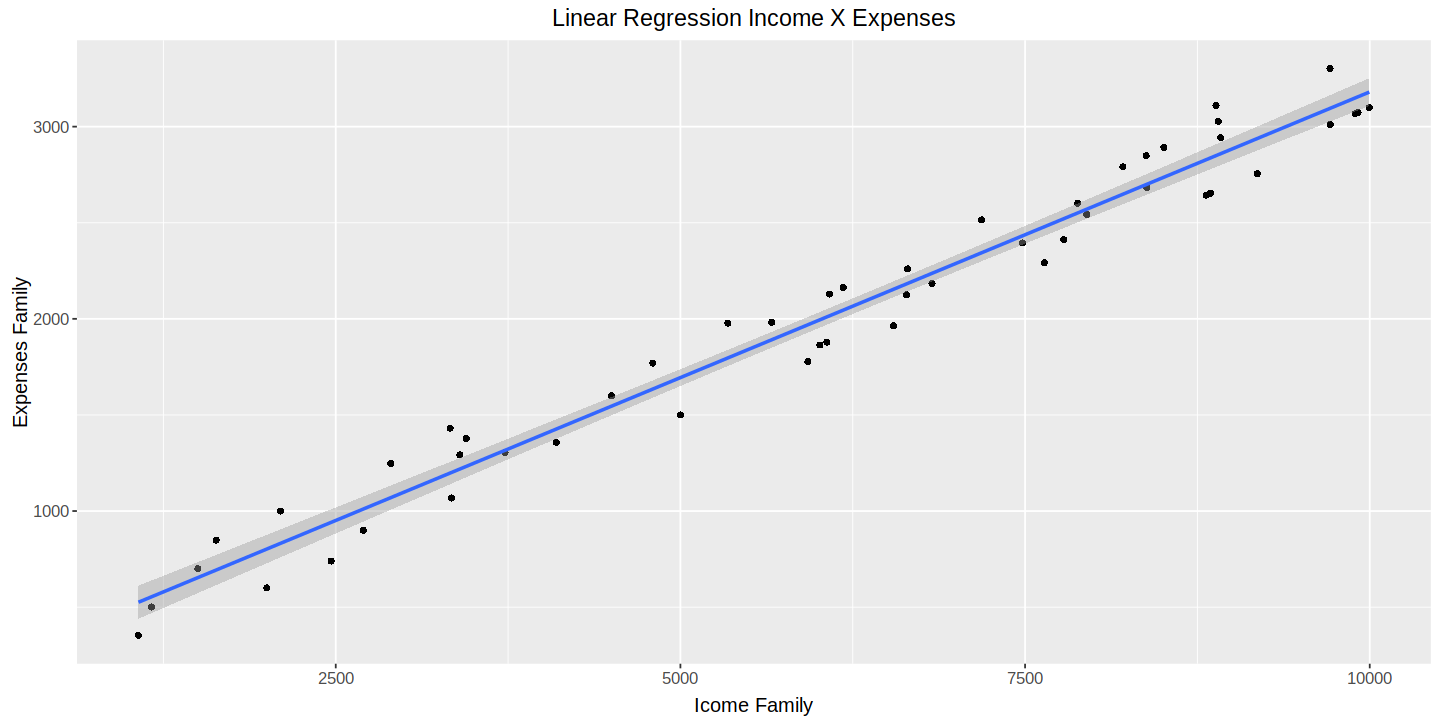

In [34]:
ggplot(data = dataset_regression, aes(x = X, y = Y)) +
    geom_point(size = 2, stroke = 0) +
    geom_smooth(method = lm, formula = y ~ x) +
    xlab('Icome Family') +
    ylab('Expenses Family') + 
    ggtitle('Linear Regression Income X Expenses') +
    config_graphic

### Correlation Matrix 

In [35]:
cor(dataset_regression)

,Y,X
Y,1.0000000,0.9848352
X,0.9848352,1.0000000


### Population regression function

The equation formulated above is known as **population regression function (FRP)** and in some books it is also represented as follows:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

It states that the expected value of the distribution of $Y$, given $X_i$, has a functional relationship with $X_i$, that is, the average response of $Y$ varies with $X$. The coefficients $\beta_1$ and $\beta_2$ are known as regression coefficients and also as intercept and angular coefficient, respectively.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

The scatterplot below makes it clear that as family income increases, on average, family consumption expenditures increase, but not at the same level. What we can say is that for an income level $X_i$ the average consumption expenditure of a
family cluster around the average consumption of all families at this level $X_i$, that is, around their conditional expectation $E(Y|X_i)$. Therefore, we can express the individual deviation of $Y_i$ around its expected value as follows:

# $$u_i = Y_i - E(Y|X_i)$$

or

# $$Y_i = E(Y|X_i) + u_i$$

where the deviation $u_i$ is an unobservable random variable that takes on positive or negative values. This variable is also known as the stochastic error term.

Note that from the above elaboration we can represent the FRP in its stochastic form as follows:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

***
## <font color = 'lightgreen'>The Least Squares Method</font>
***

***
## <font color = 'lightgreen'>Ordinary Least Squares Estimators</font>
***

### Get $n$

In [36]:
n  <- nrow(dataset_regression)
n

[1] 50

### Get $\sum{Y}$

In [37]:
SUM_Y <- sum(dataset_regression$Y) 
SUM_Y

[1] 100556

### Get $\sum{X}$

In [38]:
SUM_X <- sum(dataset_regression$X)
SUM_X

[1] 303275

### Get $\sum{X^2}$

In [39]:
SUM_X2 <- sum(apply(dataset_regression, 1, function(x) x['X'] ** 2))
SUM_X2

[1] 2198628939

### Get $\sum{Y^2}$

In [40]:
SUM_Y2 <- sum(apply(dataset_regression, 1, function(x) x['Y'] ** 2))
SUM_Y2

[1] 234954332

### Get $\sum{XY}$

In [41]:
SUM_XY <- sum(apply(dataset_regression, 1, function(x) x['X'] * x['Y']))
SUM_XY

[1] 716683794

### Get $\hat{\beta}_2$

# $$\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}$$

In [42]:
beta_2 <- (n * SUM_XY - SUM_X * SUM_Y) / (n * SUM_X2 - (SUM_X ** 2))
beta_2

[1] 0.2972907

### Get $\hat{\beta}_1$

# $$
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
$$ 

In [43]:
beta_1 <- mean(dataset_regression$Y) - beta_2 * mean(dataset_regression$X)
beta_1

[1] 207.9033

### Getting The Parameter Estimate

In [44]:
regression_result <- lm(formula = Y ~ X, data = dataset_regression)
regression_result


Call:
lm(formula = Y ~ X, data = dataset_regression)

Coefficients:
(Intercept)            X  
   207.9033       0.2973  


### Viewing the estimated parameters

In [45]:
beta_1
beta_2

[1] 207.9033

[1] 0.2972907

In [46]:
coefficients(regression_result)

(Intercept)           X 
207.9033138   0.2972907

In [47]:
summary <- summary(regression_result)
summary


Call:
lm(formula = Y ~ X, data = dataset_regression)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [48]:
summary$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),207.9033138,50.126682183,4.147558,1.362270e-04
X,0.2972907,0.007559238,39.328132,3.555543e-38


***
## <font color = 'lightgreen'> Getting Predctions</font>
***

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

### In-sample predictions

In [49]:
dataset_regression['Y_expected'] <- beta_1 + beta_2 * dataset_regression$X
head(dataset_regression)

,Y,X,Y_expected
,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785
2,1305,3728,1316.203
3,1879,6062,2010.079
4,2654,8845,2837.439
5,2849,8378,2698.605
6,1068,3338,1200.260


### Using the R function

In [50]:
dataset_regression['Y_expected_R'] <- regression_result$fitted.values
head(dataset_regression)

,Y,X,Y_expected,Y_expected_R
,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785
2,1305,3728,1316.203,1316.203
3,1879,6062,2010.079,2010.079
4,2654,8845,2837.439,2837.439
5,2849,8378,2698.605,2698.605
6,1068,3338,1200.260,1200.260


### Estimating 'Household Spending' out of sample

In [51]:
predict_M <- function(x){
    return(beta_1 + beta_2 * x)
}

In [52]:
predict_M(7500)

[1] 2437.583

### Estimating 'Household Spending' out of sample with the R function

In [53]:
predict(regression_result, data.frame(X = c(7500, 7510)) )

1        2 
2437.583 2440.556

***
## <font color = 'lightgreen'>Residuals</font>
***

As we saw previously, the residual of the ith observation is the difference between the observed value of our dependent variable ($Y_i$) and the estimated value of the dependent variable ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

In other words, $\hat{u}_i$ is the error obtained when using the estimated regression equation to predict the value of the dependent variable.

In [54]:
dataset_regression['U'] <- dataset_regression$Y - dataset_regression$Y_expected

In [56]:
dataset_regression['Residuals'] <- regression_result$residuals
head(dataset_regression)

,Y,X,Y_expected,Y_expected_R,U,Residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948,-183.43948
5,2849,8378,2698.605,2698.605,150.39528,150.39528
6,1068,3338,1200.260,1200.260,-132.25964,-132.25964


In [57]:
mean(dataset_regression$Residuals)

[1] -2.516876e-15

***
## <font color = 'lightgreen'>Assumptions About The Error Term $u$</font>
***

### Plotting the model residuals

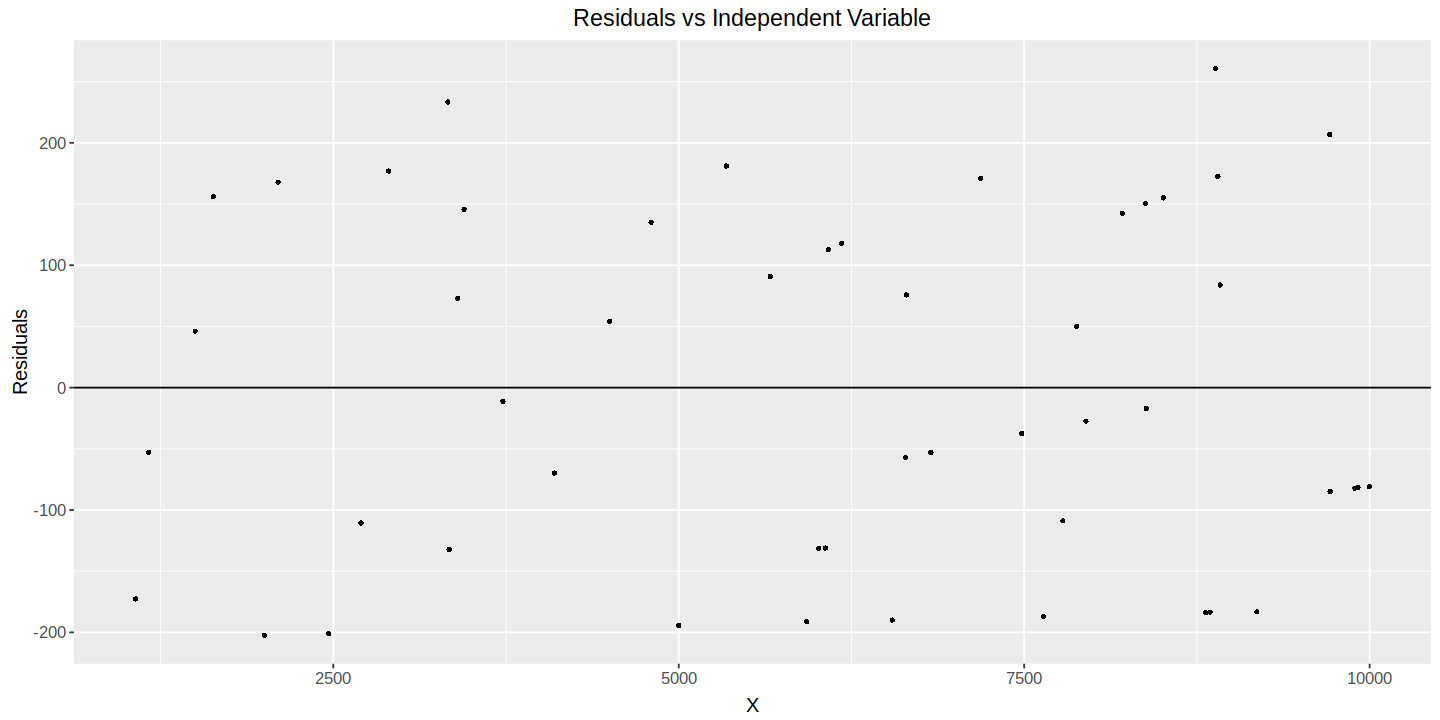

In [58]:
ggplot(data = dataset_regression, aes(x = X, y = Residuals)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("X") + 
    ylab("Residuals") + 
    ggtitle('Residuals vs Independent Variable') +
    config_graphic

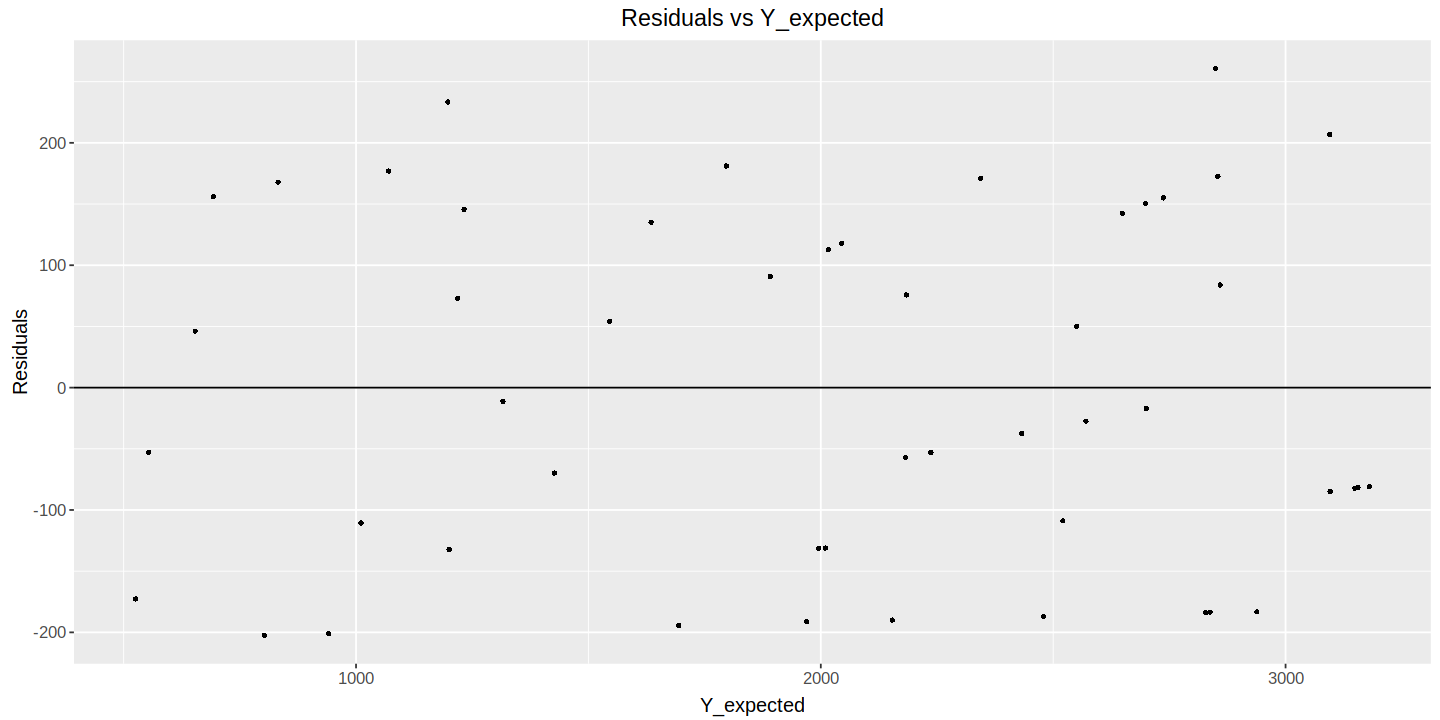

In [59]:
ggplot(data = dataset_regression, aes(x = Y_expected, y = Residuals)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab('Y_expected') + 
    ylab('Residuals') + 
    ggtitle('Residuals vs Y_expected') +
    config_graphic

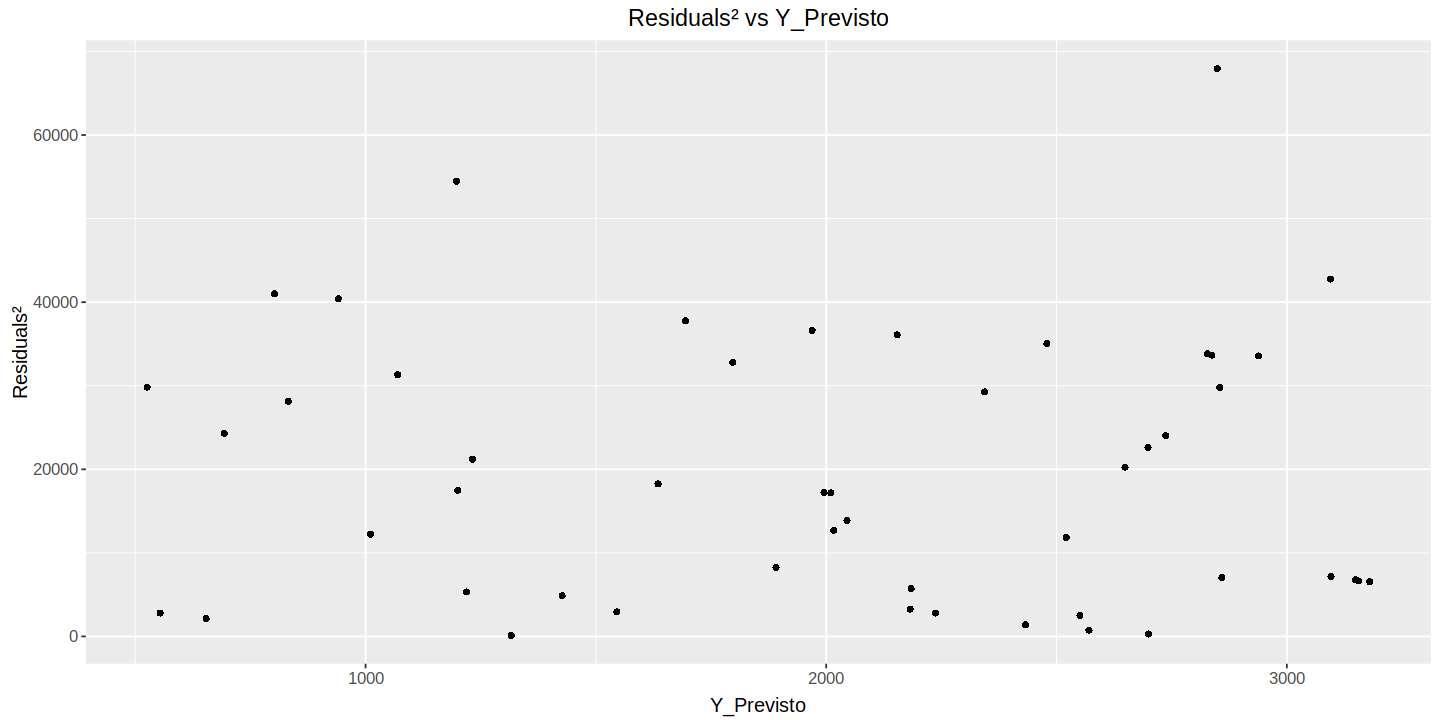

In [60]:
ggplot(data = dataset_regression, aes(x = Y_expected, y = Residuals ** 2)) + 
    geom_point(size = 2, stroke = 0) + 
    xlab('Y_Previsto') + 
    ylab('Residuals²') + 
    ggtitle('Residuals² vs Y_Previsto') +
    config_graphic

***
## <font color = 'lightgreen'>The Coefficient of Determination $R^2$<>
***

The **coefficient of determination R²** is a summary measure that tells how much the sample regression line fits the data. It can be obtained from the following formula:

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{ (Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

We know that the i-th residue represents the error of using $\hat{Y}_i$ to estimate $Y_i$. The sum of the squares of these residuals is the value that is minimized by the least squares method. This value can be represented as follows:

# $$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

The SQE value is a measure of the error of using the estimated regression equation to estimate the values of the dependent variable in the sample.

Another component that we can measure is the total sum of squares (SQT) which represents the measure of error involved in using the mean ($\bar{Y}$) to make the estimates. The SQT can be represented as below:

# $$SQT = \sum{(Y_i - \bar{Y})^2}$$

To quantify how much the estimated values ($\hat{Y}_i$) deviate from the mean ($\bar{Y}$) we can obtain another sum of squares. This sum is called the sum of squares of the regression (SQR) and is represented by the following formula:

# $$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


### Sum of squares of errors (SQE)

In [61]:
head(dataset_regression)

,Y,X,Y_expected,Y_expected_R,U,Residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948,-183.43948
5,2849,8378,2698.605,2698.605,150.39528,150.39528
6,1068,3338,1200.260,1200.260,-132.25964,-132.25964


In [62]:
SQE <- sum(apply(dataset_regression, 1, function(x) x['Residuals'] ** 2))
SQE

[1] 984986

### Total Sum of Squares (SQT)

In [63]:
SQT <- sum(apply(dataset_regression, 1, function(x)(x['Y'] - mean(dataset_regression$Y)) ** 2))
SQT

[1] 32724149

### Sum of Squares Regression (SQR)

In [70]:
SQR <- sum(apply(dataset_regression, 1, function(x)(x['Y_expected'] - mean(dataset_regression$Y)) ** 2))
SQR

[1] 31739163

### ANOVA

In [71]:
anova <- anova(regression_result)
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


In [72]:
anova[1, 2]

[1] 31739163

In [73]:
anova[2, 2]

[1] 984986

In [74]:
anova[1, 2] + anova[2, 2]

[1] 32724149

### Relationship between sums of squares

# $$SQT = SQR + SQE$$

Where,


### $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

### $SQT = \sum{(Y_i - \bar{Y})^2}$

### $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

### Coefficient of determination (R²)

The estimated regression would have a perfect fit if all values of the dependent variable ($Y_i$) lie on the estimated regression line. When this occurs we have $Y_i - \hat{Y}_i = 0$ for all observations, which results in $SQE = 0$. As $SQT=SQR+SQE$, it is possible to deduce that to have a perfect fit $SQT$ must be equal to $SQR$ and the ratio between these measurements ($\frac{SQR}{SQT}$) must be equal to 1.

When the adjustment is not so perfect, it is noted that the $SQE$ presents larger values, which makes the ratio $\frac{SQR}{SQT}$ decrease, and in a situation of total imperfection of the adjustment we would have $SQR=0 $ and $SQE=SQT$ leading to $\frac{SQR}{SQT}=0$.

The ratio $\frac{SQR}{SQT}$, which takes values between 0 and 1, is used as a measure of efficiency in adjusting the estimated regression equation. This measurement is known as coefficient of determination (R²).

# $$R^2 = \frac{SQR}{SQT}$$

## <font color='red'>Note</font>
> Only using R² is it impossible to draw conclusions about whether or not the relationship between $Y$ and $X$ is statistically significant
significant. This type of statement must be based on considerations involving sample size and the properties of the sampling distribution of least squares estimators.


In [75]:
R2 <- SQR / SQT
R2

[1] 0.9699003

In [76]:
summary


Call:
lm(formula = Y ~ X, data = dataset_regression)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [77]:
summary$r.square

[1] 0.9699003

***
## <font color ='lightgreen'>Tests Applied to Regression Models</font>
***

As we saw, in a simple linear regression, the mean of the dependent variable ($Y$) is a linear function of the independent variable ($X$):

# $$Y_i = \beta_1 + \beta_2X_i$$

If the value of $\beta_2$ is zero we can verify that the average value of $Y$ does not depend on the value of $X$ and, therefore, we conclude that $X$ and $Y$ are not linearly related. Alternatively, if the value of $\beta_2$ is not equal to zero, we conclude that the two variables are related.

To test whether the regression relationship is significant, it is necessary to perform a **hypothesis test** to determine whether the value of $\beta_2$ is zero. Before carrying out this type of test we need to obtain an estimate for $\sigma^2$ (error variance).

### Output of the estimated regression model

In [78]:
summary


Call:
lm(formula = Y ~ X, data = dataset_regression)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [79]:
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


### Mean squared error - estimate $\sigma^2$

Remember that the **sum of squared errors (SQE)** is a numerical measure of the variability of the observed data around the estimated regression line. All sums of squares, studied previously, are associated with a certain number of degrees of freedom. In the case of SQE, as two parameters must be estimated, we have $n-2$ degrees of freedom.

The **mean squared error**, represented by the equation below, can be obtained by dividing the SQE by $n-2$ degrees of freedom.

# $$EQM = \frac{SQE}{n-2}$$

In [80]:
SQE

[1] 984986

In [81]:
n

[1] 50

In [82]:
EQM <- SQE / (n - 2)
EQM

[1] 20520.54

In [83]:
EQM <- anova$'Mean Sq'[2]
EQM

[1] 20520.54

In [84]:
EQM <- anova['Residuals', 'Mean Sq']
EQM

[1] 20520.54

### Hypothesis test for null angular coefficient

Consider the following simple linear regression model:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

If the variables $Y$ and $X$ are linearly related, $\beta_2$ is expected to be non-zero. To test this hypothesis, we formulated a hypothesis test with the following specification of null and alternative hypotheses:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

If $H_0$ is rejected, we will conclude that there is a statistically significant linear relationship between the two variables.

Now consider that $b_1$ and $b_2$ are our least squares estimators. Consider that the sampling distribution of $b_2$ follows a normal distribution and also the following properties:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

As we do not know the value of $\sigma$, we use $s$ as an estimate:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note that the expected value of $b_2$ is $\beta_2$, therefore, $b_2$ is an unbiased estimator of $\beta_2$. Below we have the test statistic (t) that follows a Student t distribution with $n-2$ degrees of freedom.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

### Calculating $s$

In [85]:
s <- sqrt(EQM)
s

[1] 143.2499

### Calculating $\sum{(X_i - \bar{X})^2}$

In [86]:
SUM_SD2 <- sum(apply(dataset_regression, 1, function(x) (x['X'] - mean(dataset_regression$X)) ** 2))
SUM_SD2

[1] 359114426

### Calculating $s_{b_2}$

In [87]:
s_beta_2 <- s / sqrt(SUM_SD2)
s_beta_2

[1] 0.007559238

### Determining the acceptance and rejection areas of $H_0$

### Confidence and significance levels

In [88]:
confidence <- 0.95
meaningfulness <- 0.05

In [90]:
degrees_of_freedom <- regression_result$df.residual 
degrees_of_freedom
n - 2

[1] 48

[1] 48

### Getting $t_{\alpha/2}$

In [91]:
probability <- (0.5 + (confidence /  2))
probability

[1] 0.975

In [92]:
t_alpha_2 <- qt(probability, degrees_of_freedom)
t_alpha_2

[1] 2.010635

### Getting $t = \frac{b_2 - \beta_2}{s_{b_2}}$

In [93]:
t <- (beta_2 - 0) / s_beta_2
t

[1] 39.32813

In [94]:
coefficients <- summary$coefficients
coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),207.9033138,50.126682183,4.147558,1.362270e-04
X,0.2972907,0.007559238,39.328132,3.555543e-38


In [95]:
coefficients['X', 't value']

[1] 39.32813

### <font color='red'>Critical value criterion</font>

> ### Two-tailed Test
> ### Reject $H_0$ if $t \leq -t_{\alpha / 2}$ or if $t \geq t_{\alpha / 2}$

In [96]:
t <= -t_alpha_2

[1] FALSE

In [97]:
t >= t_alpha_2

[1] TRUE

### <font color='red'>$p-value$ criterion</font>

> ### Two-tailed Test
> ### Reject $H_0$ if value $p\leq\alpha$

In [98]:
p_value <- 2 * (pt(t, degrees_of_freedom, lower.tail = FALSE))
p_value

[1] 3.555543e-38

In [99]:
p_value <- coefficients['X', 'Pr(>|t|)']
p_value

[1] 3.555543e-38

In [100]:
p_value <= meaningfulness

[1] TRUE

***
## <font color = 'lightgreen'>Conclusion: We reject $H_0$ and conclude that there is a significant relationship between the two variables.</font>
***

In [101]:
summary


Call:
lm(formula = Y ~ X, data = dataset_regression)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [102]:
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


### Test F

The F test is also a tool for testing significance in regression. Based on the F probability distribution, the F test is used to check the global significance in the regression, that is, in a multiple regression, where there is more than one independent variable, the F test checks the nullity of all model parameters together.

In our case (simple linear regression) it provides the same conclusion obtained with the t-test.

**Hypotheses:**

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

**Test stat:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Where,

$SQR$ - sum of squares of the regression

$SQE$ - sum of squares of errors

$k$ - total independent variables ($X$)

**$H_0$ rejection rules:**

**Critical value criterion** $\rightarrow$ Reject if $F \geq F_{\alpha}$

Where,

$F_{\alpha}$ - is based on the F distribution with $k$ degrees of freedom in the numerator and $n-k-1$ in the denominator.

**p-value criterion** $\rightarrow$ Reject if $p-value \leq \alpha$

### Calculating the test statistic ($F$)

In [103]:
F <- anova['X', 'Mean Sq'] / anova['Residuals', 'Mean Sq']
F

[1] 1546.702

In [104]:
anova['X', 'F value']

[1] 1546.702

### Getting the p-value

In [105]:
p_value <- anova['X', 'Pr(>F)']
p_value

[1] 3.555543e-38

In [106]:
p_value <= meaningfulness

[1] TRUE